In [36]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## Hotels Data

In [3]:
osm = gpd.read_file("data/hotel/gis_osm_pois_a_free_1.shp")

In [8]:
hotel = osm[osm["fclass"] == "hotel"]

In [9]:
lsoa = gpd.read_file("data/boundaries/LSOA_2004_London_Low_Resolution.shp")

In [13]:
#LSOA is in the British National Grid (BNG) coordinate reference system.
hotel = hotel.to_crs(lsoa.crs)

In [15]:
#Spatially joining the LSOA to each listing
lsoa_h = hotel.sjoin(lsoa, predicate="within")

In [17]:
#Number of hotels by LSOA
lsoa_h["count"] = 1
hotel_count = lsoa_h.groupby("LSOA_CODE")["count"].sum().reset_index()
#hotel_count

,LSOA_CODE,count
0,E01000004,16
1,E01000005,5
2,E01000010,2
3,E01000036,1
4,E01000047,3
...,...,...
378,E01004761,18
379,E01004762,7
380,E01004763,7
381,E01004764,7


In [27]:
lsoa_hotels = lsoa.merge(hotel_count, on="LSOA_CODE", how= "left")

In [33]:
lsoa_hotels['count'] = lsoa_hotels['count'].fillna(0)


In [41]:
la = lsoa.dissolve(by="LA_NAME")

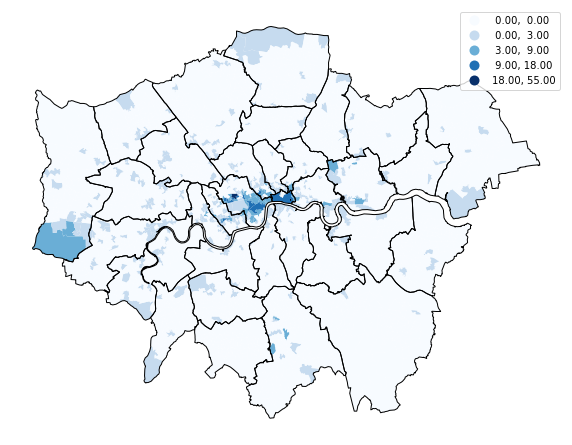

In [46]:
fig, ax = plt.subplots(1, figsize=(10,10))

lsoa_hotels.plot(column = "count", scheme="fisher_jenks", cmap="Blues", ax=ax, legend=True)
la.plot(color="none", edgecolor="black", linewidth=1, ax=ax)

plt.axis("off")

plt.show()

## AirBnB Data

## Culture data